In [1]:
import datetime as dt  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set()
%matplotlib inline

In [2]:
# Load the data
calls = pd.read_csv('../data/callsforservicefiltered.csv', header=0, low_memory=True, 
                    memory_map=True)
print(len(calls))
#calls.dtypes

C:\Users\ltran\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1124451


# 1. Clean Up

In [3]:
# Filter out rows where cancelled calls field = True, report only field = True.

calls = calls[calls.rptonly != True]
calls = calls[calls.cancelled != True]
print(len(calls))

1101654


In [4]:
# Filter out rows where nature = Transport to Animal Shelter.

calls = calls[calls.nature != 'TRANSPORT TO ANIMAL SHELTER']
print(len(calls))

1083514


In [5]:
# Filter out "Traffic Stop" because the response time is relevant since it does not get call from dispather
calls = calls[calls.nature != 'TRAFFIC STOP']
print(len(calls))

969028


In [6]:
# Filter out "911 UNKNOWN" calls since this could not be classified
calls = calls[calls.nature != '911 UNKNOWN']
print(len(calls))

965217


In [7]:
#Remove unnessessary columns
calls.drop(columns = ['statbeat','ra'], inplace=True)
calls

,calltime,callsource,city,nature,nature2,priority,rptonly,service,agency,district,...,secs2ar,secs2tr,secs2lc,secsdi2en,secsdi2ar,secsar2tr,secsar2lc,secsrt2dsp,secstr2lc,firstdisp
1,2012-07-01T00:09:07Z,E911,G,HEMORRHAGE / LACERATIONS,NaN,4,False,EMS,EMS,B6,...,571,2059,3025,48,393,1881,2454,43,965,M261
3,2012-07-01T00:15:56Z,E911,W,SEIZURES-CONVULSIONS,NaN,1,False,EMS,EMS,B5,...,915,1519,5437,45,854,1457,4522,30,3918,M2
4,2012-07-01T00:17:20Z,E911,W,SEIZURES-CONVULSIONS,NaN,P,False,FIRE,GCF,ALAM,...,685,0,1586,279,677,0,900,8,0,E44
5,2012-07-01T00:19:24Z,E911,G,FALLS-BACK INJURIES(TRAUMATIC),NaN,3,False,EMS,EMS,B4B,...,0,0,339,23,0,0,0,10,0,M241
6,2012-07-01T00:24:42Z,E911,G,SICK PERSON,NaN,4,False,EMS,EMS,B1,...,306,1335,2602,22,224,1253,2295,29,1267,M211
8,2012-07-01T00:30:03Z,W911,H,CHEST PAIN,NaN,1,False,EMS,EMS,B2,...,340,1107,2430,47,277,1043,2090,17,1323,M221
9,2012-07-01T00:33:11Z,PHONE,SU,DOMESTIC DISPUTE,NaN,1,False,LAW,GCSD,SD1,...,1148,0,2257,105,290,0,1109,102,0,S314
10,2012-07-01T00:37:41Z,SELF,G,LEGAL PAPER / COMPLAINT,NaN,2,False,LAW,GCSD,GPD1,...,0,0,3734,0,0,0,3734,0,0,S324
11,2012-07-01T00:46:35Z,E911,G,BREATHING PROBLEMS,NaN,1,False,EMS,EMS,B6,...,689,0,1200,26,604,0,511,56,0,MA32
12,2012-07-01T00:47:14Z,E911,G,SICK PERSON,NaN,4,False,EMS,EMS,B6,...,323,753,2339,21,210,640,2015,37,1585,MA32


In [8]:
calls['actualnature'] = [x['nature2'] if x['nature'] is np.nan and x['nature']!=x['nature2']
                        else x['nature'] for i,x in calls.iterrows()]
calls = calls.drop(columns = ['nature','nature2'])
calls = calls.rename(columns={'actualnature' : 'nature'})

In [9]:
calls['calltime'] = pd.to_datetime(calls.calltime)
calls['year'] = calls.calltime.apply(lambda x: x.date().year)
calls['month'] = calls.calltime.apply(lambda x: x.date().month)
calls['dayOfMonth'] = calls.calltime.apply(lambda x: x.date().day)
calls['hour'] = calls.calltime.apply(lambda x: x.time().hour)
calls = calls.rename(columns={'calldow' : 'dayOfWeek'})
calls = calls.drop(columns = ['timeclose', 'calltime'], axis = 1)
calls

,callsource,city,priority,rptonly,service,agency,district,gp,primeunit,cancelled,...,secsar2tr,secsar2lc,secsrt2dsp,secstr2lc,firstdisp,nature,year,month,dayOfMonth,hour
1,E911,G,4,False,EMS,EMS,B6,627,M261,False,...,1881,2454,43,965,M261,HEMORRHAGE / LACERATIONS,2012,7,1,0
3,E911,W,1,False,EMS,EMS,B5,513,M2,False,...,1457,4522,30,3918,M2,SEIZURES-CONVULSIONS,2012,7,1,0
4,E911,W,P,False,FIRE,GCF,ALAM,44C,E44,False,...,0,900,8,0,E44,SEIZURES-CONVULSIONS,2012,7,1,0
5,E911,G,3,False,EMS,EMS,B4B,406,M241,False,...,0,0,10,0,M241,FALLS-BACK INJURIES(TRAUMATIC),2012,7,1,0
6,E911,G,4,False,EMS,EMS,B1,119,M211,False,...,1253,2295,29,1267,M211,SICK PERSON,2012,7,1,0
8,W911,H,1,False,EMS,EMS,B2,202,M221,False,...,1043,2090,17,1323,M221,CHEST PAIN,2012,7,1,0
9,PHONE,SU,1,False,LAW,GCSD,SD1,SD12,S314,False,...,0,1109,102,0,S314,DOMESTIC DISPUTE,2012,7,1,0
10,SELF,G,2,False,LAW,GCSD,GPD1,P110,S324,False,...,0,3734,0,0,S324,LEGAL PAPER / COMPLAINT,2012,7,1,0
11,E911,G,1,False,EMS,EMS,B6,620,M231,False,...,0,511,56,0,MA32,BREATHING PROBLEMS,2012,7,1,0
12,E911,G,4,False,EMS,EMS,B6,602,MA32,False,...,640,2015,37,1585,MA32,SICK PERSON,2012,7,1,0


In [10]:
# split the data up by agency
ems_calls = calls[calls.agency == 'EMS']
aco_calls = calls[calls.agency == 'ACO']
gcsd_calls = calls[calls.agency == 'GCSD']
gcf_calls = calls[calls.agency == 'GCF']

In [11]:
ems_calls

,callsource,city,priority,rptonly,service,agency,district,gp,primeunit,cancelled,...,secsar2tr,secsar2lc,secsrt2dsp,secstr2lc,firstdisp,nature,year,month,dayOfMonth,hour
1,E911,G,4,False,EMS,EMS,B6,627,M261,False,...,1881,2454,43,965,M261,HEMORRHAGE / LACERATIONS,2012,7,1,0
3,E911,W,1,False,EMS,EMS,B5,513,M2,False,...,1457,4522,30,3918,M2,SEIZURES-CONVULSIONS,2012,7,1,0
5,E911,G,3,False,EMS,EMS,B4B,406,M241,False,...,0,0,10,0,M241,FALLS-BACK INJURIES(TRAUMATIC),2012,7,1,0
6,E911,G,4,False,EMS,EMS,B1,119,M211,False,...,1253,2295,29,1267,M211,SICK PERSON,2012,7,1,0
8,W911,H,1,False,EMS,EMS,B2,202,M221,False,...,1043,2090,17,1323,M221,CHEST PAIN,2012,7,1,0
11,E911,G,1,False,EMS,EMS,B6,620,M231,False,...,0,511,56,0,MA32,BREATHING PROBLEMS,2012,7,1,0
12,E911,G,4,False,EMS,EMS,B6,602,MA32,False,...,640,2015,37,1585,MA32,SICK PERSON,2012,7,1,0
19,E911,G,1,False,EMS,EMS,B3A,301,M251,False,...,1792,3943,9,2624,M251,HEART PROBLEMS,2012,7,1,1
20,PHONE,G,5,False,EMS,EMS,B4A,401,MA32,False,...,1279,3141,605,1862,MA32,CONVALESCENT TRANSPORT,2012,7,1,1
22,E911,G,3,False,EMS,EMS,B1,108,M211,False,...,1209,1691,21,1128,M211,ASSAULT / RAPE,2012,7,1,1


In [32]:
ems_groupby_nature_size = ems_calls.groupby('nature')['secsdi2en'].size().sort_values(ascending=False).reset_index(name='size')
ems_groupby_nature_size
#ems_groupby_nature_size


,nature,size
0,SICK PERSON,64109
1,FALLS-BACK INJURIES(TRAUMATIC),54876
2,BREATHING PROBLEMS,40025
3,CONVALESCENT TRANSPORT,31732
4,CHEST PAIN,30974
5,UNCONSCIOUS-FAINTING,28620
6,ACCIDENT WITH PERSONAL INJURY,25774
7,EMS RESPONSE - NON EMERGENCY,21177
8,SEIZURES-CONVULSIONS,15845
9,TRANSFER INTERFACILITY,15239


In [33]:
ems_groupby_nature_mean = ems_calls.groupby('nature')['secsdi2en'].mean().sort_values(ascending=False).reset_index(name='second')
ems_groupby_nature_mean

,nature,second
0,HAZMAT,274.000000
1,EMS TACTICAL CALL,218.853211
2,ACCIDENT PI W/TRACTOR TRAILER,107.000000
3,HOSPICE TRANSPORT,79.956897
4,DEAD BODY TRANSPORT-PTAR ONLY,50.050462
5,TRANSPORT ONLY- MED FACILITY,49.150039
6,AIR ALERT 3 SMALL AIRCRAFT,46.666667
7,ASSIST PATIENT,39.026596
8,DISORDERLY SUBJECT OR CROWD,39.000000
9,AIR ALERT 1 SMALL AIRCRAFT,36.773585


In [34]:
ems_merged = pd.merge(ems_groupby_nature_size,ems_groupby_nature_mean,on='nature')
ems_merged

,nature,size,second
0,SICK PERSON,64109,31.463726
1,FALLS-BACK INJURIES(TRAUMATIC),54876,30.346672
2,BREATHING PROBLEMS,40025,29.235403
3,CONVALESCENT TRANSPORT,31732,35.594258
4,CHEST PAIN,30974,29.116969
5,UNCONSCIOUS-FAINTING,28620,29.031342
6,ACCIDENT WITH PERSONAL INJURY,25774,28.231823
7,EMS RESPONSE - NON EMERGENCY,21177,32.660811
8,SEIZURES-CONVULSIONS,15845,28.814516
9,TRANSFER INTERFACILITY,15239,31.984645


In [35]:
ems_merged["size"].describe()


count       91.000000
mean      5229.659341
std      11453.974392
min          1.000000
25%          4.000000
50%        206.000000
75%       4038.500000
max      64109.000000
Name: size, dtype: float64

## Find Outlier

In [36]:
iqr_ems = ems_merged["size"].quantile(0.75) - ems_merged["size"].quantile(0.25)
iqr_ems



4034.5

In [37]:
# median
median_size_ems = ems_merged["size"].quantile(0.50)
median_size_ems


206.0

In [38]:
# lower outlier bound
lower_outlier_bound_ems = ems_merged["size"].quantile(0.25) - 1.5 * iqr_ems
lower_outlier_bound_ems

-6047.75

In [39]:
# upper outlier bound
upper_outlier_boud_ems = ems_merged["size"].quantile(0.75) +  1.5 * iqr_ems
upper_outlier_boud_ems


10090.25

In [40]:
# new data range after outlier has been removed
ems_outlier_removed = ems_merged[(ems_merged['size'] > lower_outlier_bound_ems) & (ems_merged['size'] < upper_outlier_boud_ems) ]
ems_outlier_removed


,nature,size,second
15,STROKE (CVA),9287,28.920103
16,OVERDOSE-INGESTION-POISONING,8316,30.216450
17,TRAUMATIC INJURIES - SPECIFIC,6514,29.690973
18,HEART PROBLEMS,5824,29.494677
19,ASSAULT / RAPE,5385,30.992201
20,EMS ASSISTANCE NEEDED,5377,33.505300
21,CARDIAC / RESPIRATORY ARREST,5248,28.243902
22,ALLERGIES-HIVES-STINGS,4166,30.002400
23,BACK PAIN (NON-TRAUMATIC),3911,31.434160
24,PREGNANCY-CHILDBIRTH-MISCARRY,3686,29.780250


Text(0.5,0,'nature index')

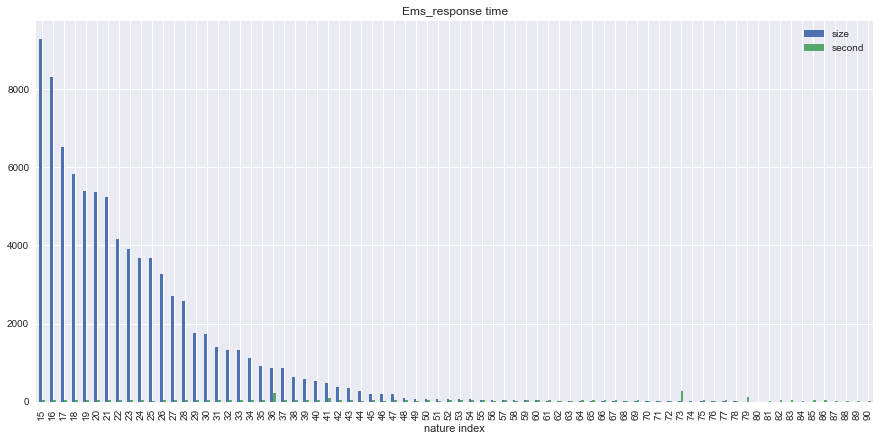

In [42]:
ems_plot = ems_outlier_removed.plot(kind='bar', title = "Ems_response time", figsize=(15,7))
ems_plot.set_xlabel("nature index")



In [44]:
ems_outlier_removed['second'].corr(ems_outlier_removed['size'])

-0.022926996921802004

# ACO

In [47]:
aco_groupby_nature= aco_calls.groupby('nature')['secsdi2en'].mean()
aco_groupby_nature

nature
ANIMAL RELATED CALL                 0.000000
FOLLOW UP                           0.000000
MISCELLANEOUS                       2.548689
TRAINING AND CONTINUING ED          0.000000
ZABANDONED ANIMAL                  22.378657
ZACOTEST                            0.733333
ZALLOWED TO RUN AT LARGE            5.932027
ZANIMAL ATTACK                     24.699535
ZANIMAL BITE                        7.004674
ZANIMAL FIGHT IN PROGRESS           0.000000
ZASSIST                             8.508872
ZBAT/RACCOON IN RESIDENCE           5.825898
ZBITE FOLLOW UP                     0.000000
ZBREEDER                            0.000000
ZCHECK WELFARE                      2.279790
ZCONFINED                           1.385511
ZCRUELTY                           26.918919
ZCRUELTY FOLLOW UP                  0.000000
ZDANGEROUS / VICIOUS CALL         110.931034
ZDANGEROUS / VICIOUS FOLLOW UP      0.000000
ZDOG LOCKED IN VEHICLE              0.297847
ZEXPOSURE                           0.000000
ZFO

In [48]:
gcsd_groupby_nature=  gcsd_calls.groupby('nature')['secsdi2en'].mean()
gcsd_groupby_nature

nature
ACCIDENT HIT & RUN W/PI-REPORT      0.000000
ACCIDENT HIT AND RUN PERS INJ      20.703704
ACCIDENT HIT AND RUN PROP DAM      25.753846
ACCIDENT W/ INJURY PIN IN          22.363636
ACCIDENT W/INJURY-GPD REPORT        6.576923
ACCIDENT WITH PERSONAL INJURY      15.057975
ACCIDENT WITH PROPERTY DAMAGE      22.160237
ACTIVE SHOOTER                     20.333333
ACTIVE SHOOTER ALARM                0.000000
AIR ALERT 1 LARGE AIRCRAFT          3.181818
AIR ALERT 1 SMALL AIRCRAFT          6.315789
AIR ALERT 2 LARGE AIRCRAFT         21.216216
AIR ALERT 2 SMALL AIRCRAFT         13.577778
AIR ALERT 3 LARGE AIRCRAFT         66.000000
AIR ALERT 3 SMALL AIRCRAFT         19.200000
AIRCRAFT EMERGENCY                 10.666667
ALARMS                             19.000000
ANIMAL BITES / ATTACKS             25.895238
ANIMAL RELATED CALL                30.951522
ARMED SUBJECT                      20.392079
ARSON INVESTIGATION               264.636364
ASSAULT (NO EMS NEEDED)            37.212494
ASS

In [49]:
gcf_groupby_nature = gcf_calls.groupby(['nature'])['secsdi2en'].mean()
gcf_groupby_nature 


nature
ABDOMINAL PAIN / PROBLEMS          79.474920
ACCIDENT HIT AND RUN PERS INJ      78.714286
ACCIDENT HIT AND RUN PROP DAM      79.583333
ACCIDENT PI W/TRACTOR TRAILER      91.000000
ACCIDENT W/ INJURY PIN IN          71.378571
ACCIDENT WITH PERSONAL INJURY      71.449776
ACCIDENT WITH PROPERTY DAMAGE      57.816265
ACTIVE SHOOTER                     55.000000
AIR ALERT 1 LARGE AIRCRAFT         20.000000
AIR ALERT 1 SMALL AIRCRAFT         44.461538
AIR ALERT 2 LARGE AIRCRAFT         44.388889
AIR ALERT 2 SMALL AIRCRAFT         40.375000
AIR ALERT 3 LARGE AIRCRAFT          9.500000
AIRCRAFT EMERGENCY                 82.333333
ALARMS                             71.647800
ALLERGIES-HIVES-STINGS             70.195051
ANIMAL BITES / ATTACKS             69.846154
ASSAULT / RAPE                     81.964401
ASSIST PATIENT                      0.000000
ATV                               103.520000
BACK PAIN (NON-TRAUMATIC)          80.243750
BREATHING PROBLEMS                 79.267975
BUR

In [50]:
ems_groupby_nature.plot(kind='bar', title = "Ems_response time", figsize=(15,7))
#gcf_calls.groupby(['nature'])['secsdi2en'].mean()

NameError: name 'ems_groupby_nature' is not defined

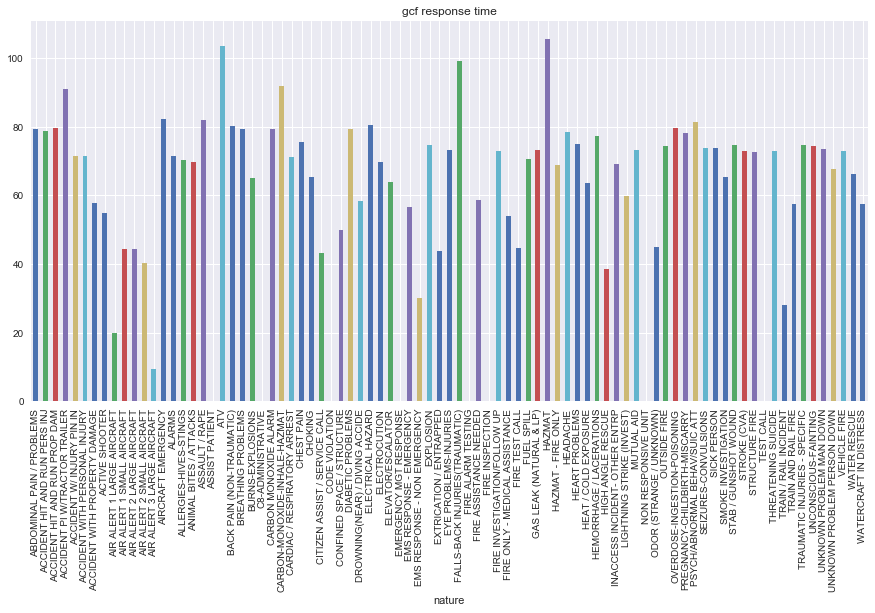

In [51]:
gcf_groupby_nature.plot(kind='bar', title = "gcf response time", figsize=(15,7))

In [ ]:
gcsd_groupby_nature.plot(kind='bar', title = "gcsd response time", figsize=(15,7))

In [ ]:
aco_groupby_nature.plot(kind='bar', title = "aco response time", figsize=(15,7))

# Progress report -3

# Data Anayltics Nature Vs. Response time!
## Goals:
### 1) Basic statistics and clean data some more for our purposes
### 2) Check the Distribution of the of response time and see patterns
### 3) Check Relationships of response time changing from month to month